<h3> Pupillometry Preprocessing </h3>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_to_folder = r"C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838"

subnums = np.arange(32, 100, 1)
subnums = np.delete(subnums, np.where((subnums == 37) | (subnums == 66)))
subject_folders = [f'sub-0{i}' for i in subnums]


['sub-032', 'sub-033', 'sub-034', 'sub-035', 'sub-036', 'sub-038', 'sub-039', 'sub-040', 'sub-041', 'sub-042', 'sub-043', 'sub-044', 'sub-045', 'sub-046', 'sub-047', 'sub-048', 'sub-049', 'sub-050', 'sub-051', 'sub-052', 'sub-053', 'sub-054', 'sub-055', 'sub-056', 'sub-057', 'sub-058', 'sub-059', 'sub-060', 'sub-061', 'sub-062', 'sub-063', 'sub-064', 'sub-065', 'sub-067', 'sub-068', 'sub-069', 'sub-070', 'sub-071', 'sub-072', 'sub-073', 'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081', 'sub-082', 'sub-083', 'sub-084', 'sub-085', 'sub-086', 'sub-087', 'sub-088', 'sub-089', 'sub-090', 'sub-091', 'sub-092', 'sub-093', 'sub-094', 'sub-095', 'sub-096', 'sub-097', 'sub-098', 'sub-099']


Loading all the event code data:

In [2]:
# Initialize an empty list to store DataFrames
all_subjects_events = []

for i in subject_folders:
    folder_path = os.path.join(path_to_folder, i, "pupil")
    filename = i + "_task-memory_events.tsv"
    file_path = os.path.join(folder_path, filename)

    # Read each CSV file into a DataFrame
    try:
        df = pd.read_csv(file_path, sep='\t', usecols=['timestamp', 'label'])
        all_subjects_events.append(df)
        
    except FileNotFoundError:
        print(f"File not found: {file_path}")

    except:
        print(file_path)

for i in all_subjects_events:
    print(i)

print(len(all_subjects_events))

File not found: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-094\pupil\sub-094_task-memory_events.tsv
File not found: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-099\pupil\sub-099_task-memory_events.tsv
         timestamp   label
0     1.603518e+09  500113
1     1.603518e+09  500213
2     1.603518e+09  500313
3     1.603518e+09  500413
4     1.603518e+09  500513
...            ...     ...
1291  1.603524e+09  500509
1292  1.603524e+09  500609
1293  1.603524e+09  500709
1294  1.603524e+09  500809
1295  1.603524e+09  500909

[1296 rows x 2 columns]
         timestamp   label
0     1.603534e+09  500105
1     1.603534e+09  500205
2     1.603534e+09  500305
3     1.603534e+09  500405
4     1.603534e+09  500505
...            ...     ...
1453  1.603541e+09  500913
1454  1.603541e+09  501013
1455  1.603542e+09  501113
1456  1.603542e+09  501213
1457  1.603542e+09  501313

[1458 rows x 2 columns]
         timestamp   label
0     1.603702e+09  500109
1     1.603702e+09  5002

Loading all the pupillometry data:

In [3]:
# Initialize an empty list to store DataFrames
all_subjects_pupil = []

for i in subject_folders:
    folder_path = os.path.join(path_to_folder, i, "pupil")
    filename = i + "_task-memory_pupil.tsv"
    file_path = os.path.join(folder_path, filename)

    
    # Read each CSV file into a DataFrame
    try:
        df = pd.read_csv(file_path, sep='\t', usecols=['pupil_timestamp', 'diameter', 'confidence', 'blink'])
        all_subjects_pupil.append(df)
        print(f"File loaded: {file_path}")
        
    except FileNotFoundError:
        print(f"File not found: {file_path}")

    except Error as e:
        print(f"{e} loading {file_path}")

print(len(all_subjects_pupil))

File loaded: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-032\pupil\sub-032_task-memory_pupil.tsv
File loaded: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-033\pupil\sub-033_task-memory_pupil.tsv
File loaded: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-034\pupil\sub-034_task-memory_pupil.tsv
File loaded: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-035\pupil\sub-035_task-memory_pupil.tsv
File loaded: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-036\pupil\sub-036_task-memory_pupil.tsv
File loaded: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-038\pupil\sub-038_task-memory_pupil.tsv
File loaded: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-039\pupil\sub-039_task-memory_pupil.tsv
File loaded: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-040\pupil\sub-040_task-memory_pupil.tsv
File loaded: C:\Users\Bruger\Documents\DTU\Thesis\Data\ds003838\sub-041\pupil\sub-041_task-memory_pupil.tsv
File loaded: C:\Users\Bruger

Adding missing values to the diameter column where the confidence is lower than 80%:

In [4]:
print(len(all_subjects_pupil))

for i in all_subjects_pupil:
    # Conditions: 'confidence' < 0.8 or 'blink' == 1
    condition = i['confidence'] < 0.8

    # Replace values with NaN for rows that meet the condition
    i.loc[condition, 'diameter'] = np.nan

    print(i.head(10))

64
   pupil_timestamp  confidence   diameter  blink
0     1.603518e+09    0.999383  33.347157      0
1     1.603518e+09    1.000000  33.346352      0
2     1.603518e+09    0.809907  34.599331      0
3     1.603518e+09    0.817906  34.599821      0
4     1.603518e+09    0.999549  33.303163      0
5     1.603518e+09    1.000000  33.302441      0
6     1.603518e+09    0.814313  34.480656      0
7     1.603518e+09    0.822792  34.481238      0
8     1.603518e+09    1.000000  33.608562      0
9     1.603518e+09    0.999539  33.609258      0
   pupil_timestamp  confidence   diameter  blink
0     1.603534e+09    0.999805  29.931720      0
1     1.603534e+09    1.000000  29.932348      0
2     1.603534e+09    1.000000  31.640831      0
3     1.603534e+09    0.999497  31.638402      0
4     1.603534e+09    0.999897  30.347747      0
5     1.603534e+09    1.000000  30.347742      0
6     1.603534e+09    0.997627  32.117628      0
7     1.603534e+09    1.000000  32.123009      0
8     1.603534e+0

In [5]:
control5 = []

for i in all_subjects_events:
    control5.append(i[i['label'].isin([6001131, 6001130, 6001050, 6001051, 6001090, 6001091])])
    # control5.append(i[i['label'].isin([500105, 500109, 500113])])
    
for i in control5:
    print(i.head(5))
    


       timestamp    label
27  1.603518e+09  6001051
32  1.603518e+09  6001091
41  1.603518e+09  6001130
54  1.603518e+09  6001051
59  1.603518e+09  6001091
       timestamp    label
27  1.603534e+09  6001131
40  1.603534e+09  6001051
45  1.603534e+09  6001091
54  1.603534e+09  6001131
67  1.603534e+09  6001131
       timestamp    label
27  1.603702e+09  6001131
40  1.603702e+09  6001051
45  1.603702e+09  6001091
54  1.603702e+09  6001131
67  1.603703e+09  6001051
       timestamp    label
27  1.603783e+09  6001051
32  1.603783e+09  6001131
45  1.603783e+09  6001091
54  1.603783e+09  6001131
67  1.603783e+09  6001091
       timestamp    label
27  1.603795e+09  6001051
32  1.603795e+09  6001130
45  1.603795e+09  6001090
54  1.603795e+09  6001091
63  1.603795e+09  6001051
       timestamp    label
27  1.604041e+09  6001131
40  1.604041e+09  6001131
53  1.604041e+09  6001091
62  1.604042e+09  6001091
71  1.604042e+09  6001091
       timestamp    label
27  1.604055e+09  6001051
32  1.604055

In [6]:
control5_epochs = []

for i in control5:
    # Filter rows with the desired labels for start and end conditions
    label_start = i[i['label'].isin([6001131, 6001130, 6001050, 6001051, 6001090, 6001091])]
    # label_start = i[i['label'].isin([500105, 500109, 500113])]

    # Initialize lists to hold the timestamps
    start = []
    end = []

    # For each timestamp of the start labels (6001050, 6001051), find the next closest end label (6005050, 6005051)
    for ts_start in label_start['timestamp']:
        # Append the results to the lists
        start.append(ts_start - 2)  # Subtract two seconds before the first number in the sequence
        end.append(ts_start + 10) # if ts_end is not None else end.append(None)  # Add three seconds after the last number in the sequence, if exists

    # Create the DataFrame for the current iteration and append to control5_epochs
    control5_epochs.append(pd.DataFrame({
        'start': start,
        'end': end
    }))

print(control5_epochs)


[           start           end
0   1.603518e+09  1.603518e+09
1   1.603518e+09  1.603518e+09
2   1.603518e+09  1.603518e+09
3   1.603518e+09  1.603518e+09
4   1.603518e+09  1.603518e+09
..           ...           ...
91  1.603523e+09  1.603523e+09
92  1.603524e+09  1.603524e+09
93  1.603524e+09  1.603524e+09
94  1.603524e+09  1.603524e+09
95  1.603524e+09  1.603524e+09

[96 rows x 2 columns],             start           end
0    1.603534e+09  1.603534e+09
1    1.603534e+09  1.603534e+09
2    1.603534e+09  1.603534e+09
3    1.603534e+09  1.603534e+09
4    1.603534e+09  1.603534e+09
..            ...           ...
103  1.603541e+09  1.603541e+09
104  1.603541e+09  1.603541e+09
105  1.603541e+09  1.603541e+09
106  1.603541e+09  1.603541e+09
107  1.603541e+09  1.603541e+09

[108 rows x 2 columns],             start           end
0    1.603702e+09  1.603702e+09
1    1.603702e+09  1.603702e+09
2    1.603702e+09  1.603702e+09
3    1.603702e+09  1.603702e+09
4    1.603703e+09  1.603703e+09
..

Function to process from a subjects epoch and pupil data to a list of dataframes of the valid trials where missing values have been filled in using linear interpolation:

In [7]:
def pupil_processing(df_epochs, df_pupil, subject_n):
    valid_trials = []
    excluded_count = 0

    # Iterate over each trial (start and end time)
    for row in df_epochs.itertuples():
        start_time = row.start
        end_time = row.end
        
        # Filter the pupil data for the current trial
        trial_data = df_pupil[(df_pupil['pupil_timestamp'] >= start_time) & (df_pupil['pupil_timestamp'] <= end_time)].copy()
        
        # Calculate Median Absolute Deviation (MAD)
        median_diameter = trial_data['diameter'].median()
        mad_diameter = np.median(np.abs(trial_data['diameter'] - median_diameter))

        # Set values where the absolute deviation is greater than 16 times the MAD to NaN
        mad_threshold = 16
        mad_mask = np.abs(trial_data['diameter'] - median_diameter) > mad_threshold * mad_diameter
        trial_data.loc[mad_mask, 'diameter'] = np.nan

        # Handle blink: Set 'diameter' to NaN where blinks occur
        blink_times = trial_data.loc[trial_data['blink'] == 1, 'pupil_timestamp'].values
        if len(blink_times) > 0:
            lower_bounds = blink_times - 0.1
            upper_bounds = blink_times + 0.1
            blink_mask = np.zeros(len(trial_data), dtype=bool)
            for lower, upper in zip(lower_bounds, upper_bounds):
                blink_mask |= (trial_data['pupil_timestamp'] >= lower) & (trial_data['pupil_timestamp'] <= upper)
            trial_data.loc[blink_mask, 'diameter'] = np.nan
        
        # Remove trials with more than 50% NaN in 'diameter'
        nan_ratio = trial_data['diameter'].isna().mean()
        if nan_ratio <= 0.5:
            # Linear interpolation for missing 'diameter' values
            trial_data.loc[:, 'diameter'] = trial_data['diameter'].interpolate(method='linear')
            
            # Forward fill to handle NaNs at the start
            trial_data.loc[:, 'diameter'] = trial_data['diameter'].ffill().bfill()
        
            # Apply 5-point moving average to the entire data (including interpolated values)
            trial_data.loc[:, 'diameter'] = trial_data['diameter'].rolling(window=5, min_periods=1).mean()

            # Convert 'pupil_timestamp' to a datetime index if not already
            trial_data['pupil_timestamp'] = pd.to_datetime(trial_data['pupil_timestamp'], unit='s')

            # Define the baseline interval (2 seconds from the start)
            start_time = trial_data['pupil_timestamp'].min()
            baseline_interval = trial_data[(trial_data['pupil_timestamp'] >= start_time) & 
                                        (trial_data['pupil_timestamp'] < start_time + pd.Timedelta(seconds=2))]
            
            # Compute the mean of pupil size during the baseline interval
            baseline_mean = baseline_interval['diameter'].mean()

            trial_data.loc[:, 'diameter'] -= baseline_mean

            trial_data.set_index('pupil_timestamp', inplace=True)

            # Resample by using a time-based approach (10 Hz = one data point every 100ms)
            trial_data = trial_data.resample('10ms').mean()

            # Forward fill to handle NaNs at the start
            trial_data.loc[:, 'diameter'] = trial_data['diameter'].ffill().bfill()

            valid_trials.append(trial_data)
        else:
            excluded_count += 1

    print("Trials excluded: {}".format(excluded_count))
    # Step 2: Check if participants have at least 6 valid trials
    if len(valid_trials) < 6:
        print("Participant has fewer than 6 valid trials. Excluding participant.")
        return None
    else:
        print(f"Valid trials count: {len(valid_trials)}")

    # Step 3: Trim each trial to the minimum length
    min_length_subject = min(len(trial) for trial in valid_trials)

    subject_valid_trials = []
    for i, trial in enumerate(valid_trials):
        subject_valid_trials.append(trial.iloc[:min_length_subject])  # Trim to minimum length

    # Initialize lists to store results
    means_subject = []
    sems_subject = []

    # Collect diameter values for each index position across all trials
    for index in range(min_length_subject):
        # Extract diameter values at this index across all trials
        diameter_values_at_index = [trial_data.iloc[index]['diameter'] for trial_data in subject_valid_trials]
        
        # Calculate mean and SEM if there are values (avoid division by zero)
        if len(diameter_values_at_index) > 0:
            mean_diameter = np.mean(diameter_values_at_index)
            sem_diameter = np.std(diameter_values_at_index, ddof=1) / np.sqrt(len(diameter_values_at_index))
        else:
            mean_diameter = np.nan
            sem_diameter = np.nan
        
        # Store results
        means_subject.append(mean_diameter)
        sems_subject.append(sem_diameter)

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Index': range(min_length_subject),
        'Mean_Diameter': means_subject,
        'SEM_Diameter': sems_subject
    })
    print(subject_folders[subject_n])
    # Display the results
    results_df.to_csv(f"Pupil_Processed/pupil_memory_{subject_folders[subject_n]}.csv")
    print("Processing complete.")
    return valid_trials


In [8]:
all_control5_valid_trials = []

for subject_n in range(len(control5_epochs)):
    print(subject_n)
    processing_result = pupil_processing(control5_epochs[subject_n], all_subjects_pupil[subject_n], subject_n)
    if processing_result:
        all_control5_valid_trials.append(processing_result)


0
Trials excluded: 2
Valid trials count: 94
sub-032
Processing complete.
1
Trials excluded: 5
Valid trials count: 103
sub-033
Processing complete.
2
Trials excluded: 8
Valid trials count: 100
sub-034
Processing complete.
3
Trials excluded: 83
Valid trials count: 25
sub-035
Processing complete.
4
Trials excluded: 65
Valid trials count: 43
sub-036
Processing complete.
5
Trials excluded: 44
Valid trials count: 64
sub-038
Processing complete.
6
Trials excluded: 23
Valid trials count: 85
sub-039
Processing complete.
7
Trials excluded: 17
Valid trials count: 91
sub-040
Processing complete.
8
Trials excluded: 0
Valid trials count: 108
sub-041
Processing complete.
9
Trials excluded: 9
Valid trials count: 99
sub-042
Processing complete.
10
Trials excluded: 10
Valid trials count: 98
sub-043
Processing complete.
11
Trials excluded: 7
Valid trials count: 101
sub-044
Processing complete.
12
Trials excluded: 46
Valid trials count: 62
sub-045
Processing complete.
13
Trials excluded: 99
Valid trials c

In [9]:
min_length = min(len(trial) for valid_trials in all_control5_valid_trials for trial in valid_trials)
print(min_length)

final_control5 = []

# Iterate over each valid_trials list and each trial within that list
for valid_trials in all_control5_valid_trials:
    for i, trial in enumerate(valid_trials):
        # Trim each trial to the minimum length by slicing the dataframe
        final_control5.append(trial.iloc[:min_length].reset_index(drop=True))

print(final_control5)


1199
[      confidence  diameter  blink
0       0.968881 -0.717780    0.0
1       0.955499 -0.165960    0.0
2       0.962992 -0.281335    0.0
3       0.947086 -0.395513    0.0
4       0.980979 -0.361418    0.0
...          ...       ...    ...
1194    0.999521  5.008532    0.0
1195    0.999327  5.113643    0.0
1196    0.999221  5.313812    0.0
1197    0.999446  4.945466    0.0
1198    0.999473  4.769301    0.0

[1199 rows x 3 columns],       confidence  diameter  blink
0       0.999521 -0.245250    0.0
1       0.999528 -0.586278    0.0
2       0.999711 -0.988585    0.0
3       0.999455 -1.073282    0.0
4       0.999466 -1.187063    0.0
...          ...       ...    ...
1194    0.998979  0.770147    0.0
1195    0.999238  0.657873    0.0
1196    0.999467  0.654988    0.0
1197    0.999081  0.868586    0.0
1198    0.998911  0.867968    0.0

[1199 rows x 3 columns],       confidence  diameter  blink
0       0.999820 -3.380885    0.0
1       0.999834 -3.745987    0.0
2       0.999947 -3.6368

In [10]:
# Initialize lists to store results
means = []
sems = []

# Collect diameter values for each index position across all trials
for index in range(min_length):
    # Extract diameter values at this index across all trials
    diameter_values_at_index = [trial_data.loc[index, 'diameter'] for trial_data in final_control5]
    
    # Calculate mean and SEM if there are values (avoid division by zero)
    if len(diameter_values_at_index) > 0:
        mean_diameter = np.mean(diameter_values_at_index)
        sem_diameter = np.std(diameter_values_at_index, ddof=1) / np.sqrt(len(diameter_values_at_index))
    else:
        mean_diameter = np.nan
        sem_diameter = np.nan
    
    # Store results
    means.append(mean_diameter)
    sems.append(sem_diameter)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Index': range(min_length),
    'Mean_Diameter': means,
    'SEM_Diameter': sems
})

# Display the results
print(results_df)
results_df.to_csv("Pupil_Processed/pupil_memory_all.csv")


      Index  Mean_Diameter  SEM_Diameter
0         0      -0.336140      0.030877
1         1      -0.366607      0.027394
2         2      -0.354137      0.026798
3         3      -0.348108      0.026386
4         4      -0.344664      0.025889
...     ...            ...           ...
1194   1194       0.412005      0.052956
1195   1195       0.402086      0.052966
1196   1196       0.400942      0.053122
1197   1197       0.401524      0.053470
1198   1198       0.380989      0.053946

[1199 rows x 3 columns]


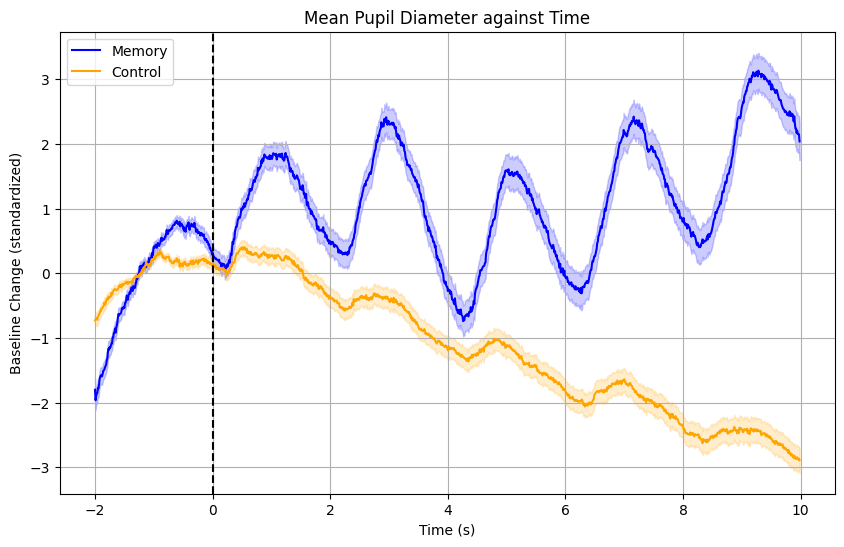

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results_df = pd.read_csv("Pupil_Processed/pupil_memory_all.csv")
results_df_control = pd.read_csv("Pupil_Processed/pupil_control_all.csv")

# Assuming results_df is the DataFrame created in the previous step
# Extract the index, mean diameter, and SEM diameter values
indices = results_df['Index']
mean_diameters = (results_df['Mean_Diameter']) / results_df['Mean_Diameter'].std()
sem_diameters = (results_df['SEM_Diameter']) / results_df['Mean_Diameter'].std()

indices_control = results_df_control['Index']
mean_diameters_control = (results_df_control['Mean_Diameter']) / results_df_control['Mean_Diameter'].std()
sem_diameters_control = (results_df_control['SEM_Diameter']) / results_df_control['Mean_Diameter'].std()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(indices*0.01 - 2, mean_diameters, marker='o', linestyle='-', color='b', label='Memory', markersize=0)
plt.plot(indices*0.01 - 2, mean_diameters_control, marker='o', linestyle='-', color='orange', label='Control', markersize=0)

# Add error shading
plt.fill_between(indices*0.01 - 2, mean_diameters - sem_diameters, mean_diameters + sem_diameters, alpha=0.2, color='blue')
plt.fill_between(indices*0.01 - 2, mean_diameters_control - sem_diameters_control, mean_diameters_control + sem_diameters_control, alpha=0.2, color='orange')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Baseline Change (standardized)')
plt.title('Mean Pupil Diameter against Time')
plt.axvline(0, color='k', linestyle='--')
plt.legend()
plt.grid(True)

# Set the x-axis ticks
plt.xticks(np.arange(-2, 11, 2))

# Show the plot
plt.show()
